### Phylogeny of beta sampled generated sequences and train sequences

In [1]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size':14})

In [2]:
from pathlib import Path
from biosynseq.metrics import get_seqs_from_fasta
import Bio.Phylo as Phylo
from Bio import SeqIO

In [3]:
import itertools
import numpy as np
from tqdm import tqdm
from typing import List
from Bio.SeqRecord import SeqRecord
from scipy.spatial import distance_matrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceMatrix, DistanceCalculator
from Bio import AlignIO

In [4]:
# function to calculate the distance of nucleotide sequences using sequence embeddings
def get_distance(embed: np.ndarray, seqs: List[SeqRecord]):
    """Return a DistanceMatrix for transformer embeddings.
    
    Parameters
    ----------
    embed : np.ndarray
        The (N, D) embedding tensor when N is the number of examples
        and D is the hidden dimension.
        
    seqs : List[Bio.SeqRecord]
        List of seqs such that seqs[i] corresponds to embed[i].
            
    """
    pairwise_dists = distance_matrix(embed, embed)
    #names = [s.id for s in seqs]
    names = list(str(i) for i in range(len(seqs)))
    dm = DistanceMatrix(names)
    for seq1_id, seq2_id in tqdm(itertools.combinations(names, 2)):
        dm[seq1_id, seq2_id] = pairwise_dists[int(seq1_id), int(seq2_id)]
    return dm

# Data: likely-wood-857 all generated sequences

### Method 1: compute sequence distance using embeddings

In [5]:
path = Path("/homes/mzvyagin/mdh_gpt2/likely-wood-857")
gen_embed_path = path / "likely-wood-857-1024concat_seqs_fasta_embeddings_mean.npy"
gen_fasta_path = path / "likely-wood-857_1024concat_seqs.fasta"

gen_embed_avg = np.load(gen_embed_path)
gen_seqs = get_seqs_from_fasta(gen_fasta_path)

In [6]:
# https://github.com/biopython/biopython/blob/master/Bio/Phylo/TreeConstruction.py#L546
constructor = DistanceTreeConstructor()

In [7]:
dm = get_distance(gen_embed_avg, gen_seqs)

523776it [00:48, 10820.74it/s]


In [8]:
# expect this cell to take a long time to run
tree = constructor.nj(dm)

In [9]:
# save the computed trees to the current directory of the notebook
Phylo.write(tree, "mdh-tree-gen-embed.xml", "phyloxml")
Phylo.write(tree, "mdh-tree-gen-embed.tree", "newick")

1

In [10]:
print(len(gen_seqs))

1024


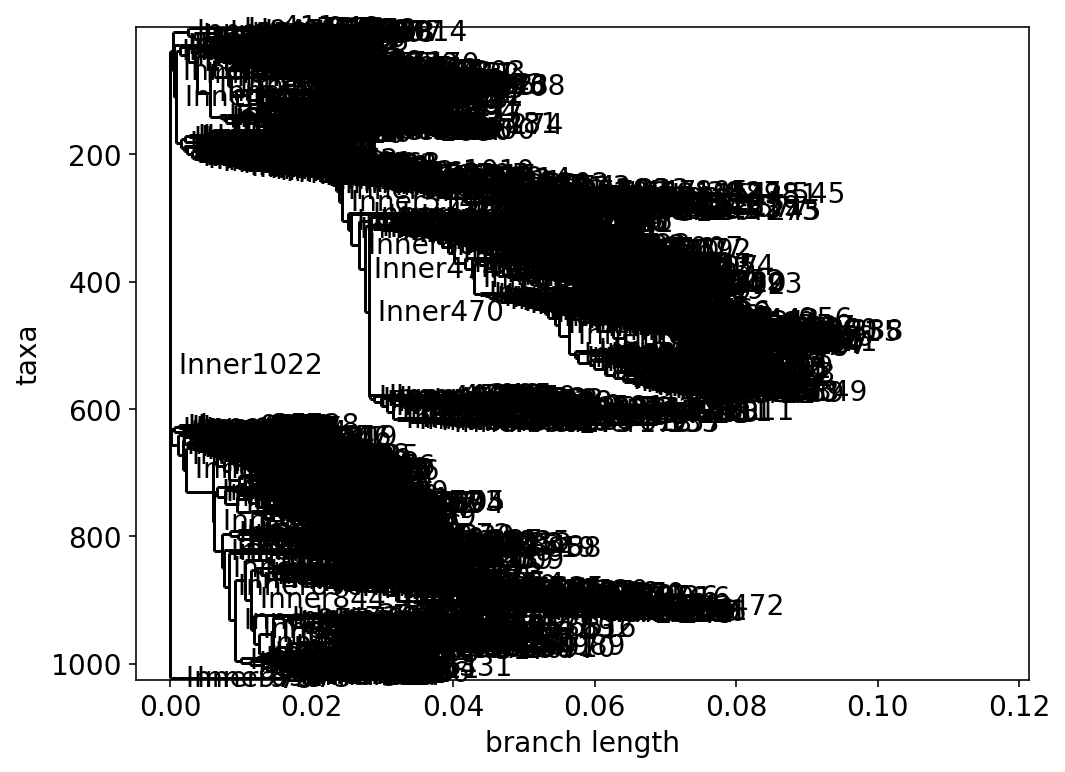

In [11]:
# draw the phylogenetic tree
tree_gen = Phylo.read("mdh-tree-gen-embed.xml", "phyloxml")
Phylo.draw(tree_gen)

In [12]:
# Phylo.draw_ascii(tree_gen)

### Method 2: compute sequence distance using Phylo's built-in distance calculator ("normal")

- Phylo's distance calculator requires MSA results of the sequences
- Therefore, the user needs to first compute MSA and use the MSA's .aln file to compute sequence distance using Phylos' built-in distance calculator

To get the MSA: <br>
`/homes/abrace/envs/msa-conda-env/bin/clustalo --in=/homes/mzvyagin/mdh_gpt2/likely-wood-857/likely-wood-857_1024concat_seqs.fasta --out=/homes/lind/MDH-pipeline/phylogeny/likely-wood-857-gen-normal.aln --force --outfmt=clustal --wrap=80 --threads=40 -v &> mdh_val_msa.out`

In [13]:
# Due to the original fasta having duplicate names, need to relabel the names properly.
for i in range(0, 1024):
    gen_seqs[i].id = f"MDHSyntheticSequence-LikelyWood857_{i}"
    gen_seqs[i].name = f"MDHSyntheticSequence-LikelyWood857_{i}"
    gen_seqs[i].description = f"MDHSyntheticSequence-LikelyWood857_{i} MDHSyntheticSequence-LikelyWood857"

# save the changed gen_seqs to a fasta file
file_name = "/homes/lind/MDH-pipeline/phylogeny/likely-wood-857_1024concat_seqs_fixed.fasta"
SeqIO.write(gen_seqs, file_name, "fasta")

1024

Linux command to get the MSA: <br>
`/homes/abrace/envs/msa-conda-env/bin/clustalo --in=/homes/lind/MDH-pipeline/phylogeny/likely-wood-857_1024concat_seqs_fixed.fasta --out=/homes/lind/MDH-pipeline/phylogeny/likely-wood-857-gen-normal-1.aln --force --outfmt=clustal --wrap=80 --threads=40 -v &> mdh_val_msa.out`

In [ ]:
aln = AlignIO.read('likely-wood-857-gen-normal-1.aln', 'clustal')
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)

In [ ]:
constructor = DistanceTreeConstructor(calculator, 'nj')
tree = constructor.build_tree(aln)

In [ ]:
Phylo.write(tree, "mdh-tree-gen-sample-normal-1.xml", "phyloxml")
Phylo.write(tree, "mdh-tree-gen-sample-normal-1.tree", "newick")

1

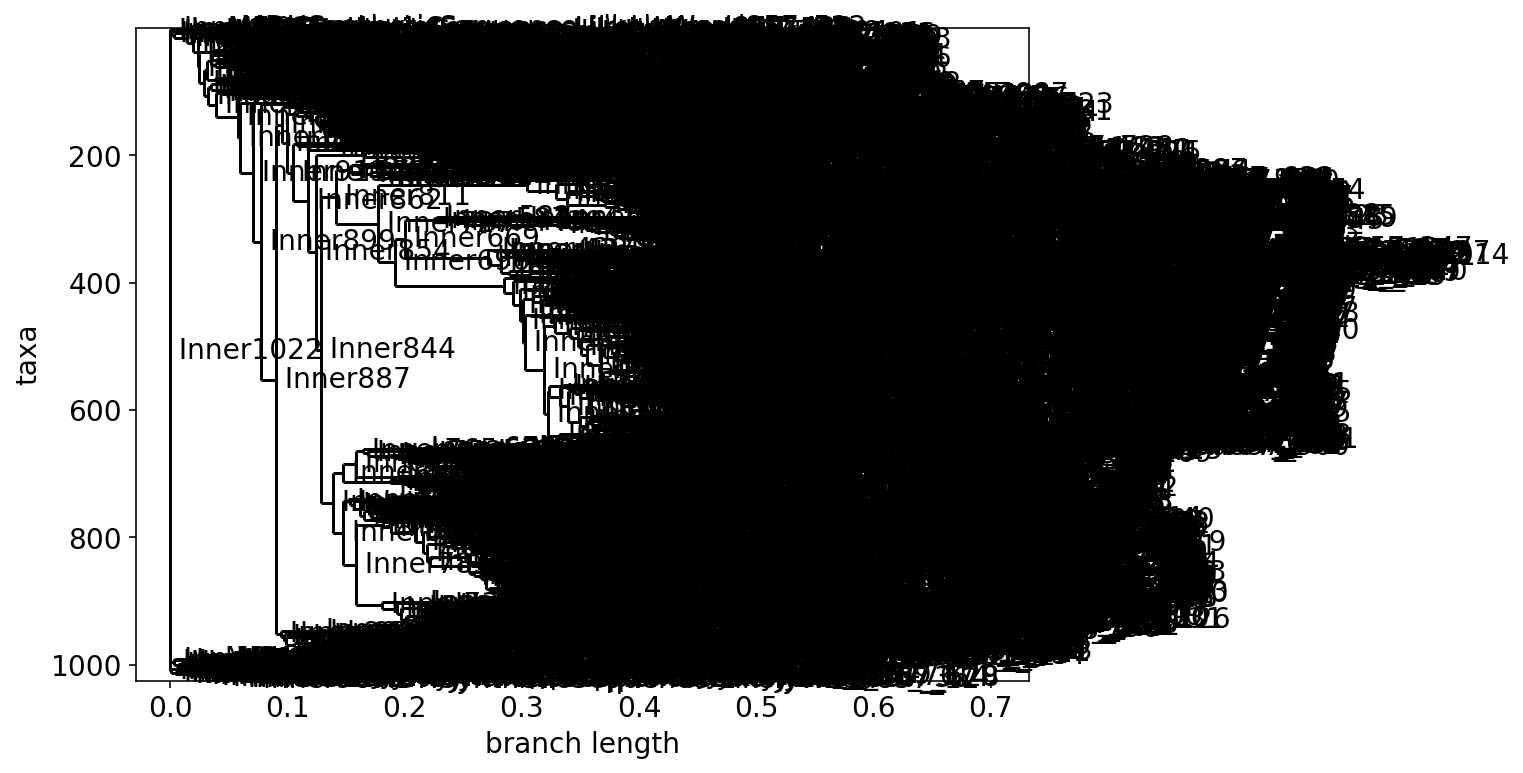

In [ ]:
tree_sample_normal_1 = Phylo.read("mdh-tree-gen-sample-normal-1.xml", "phyloxml")
Phylo.draw(tree_sample_normal_1)

# Data: likely-wood-857 all generated sequences 

source: https://github.com/ramanathanlab/gene_transformer/blob/main/examples/perlmutter/no[…]ely-wood-857/generated_seqs/likely-wood-857-mdh_gpt2_1024.fasta

### Method 2: compute sequence distance using Phylo's built-in distance calculator ("normal")

In [ ]:
gen_fasta_path2 = Path("/homes/lind/MDH-pipeline/phylogeny/likely-wood-857-mdh_gpt2_1024.fasta")
gen_seqs2 = get_seqs_from_fasta(gen_fasta_path2)
# print(gen_seqs2)
print(len(gen_seqs2))

1024


`/homes/abrace/envs/msa-conda-env/bin/clustalo --in=/homes/lind/MDH-pipeline/phylogeny/likely-wood-857-mdh_gpt2_1024.fasta --out=/homes/lind/MDH-pipeline/phylogeny/likely-wood-857-gen-normal-2.aln --force --outfmt=clustal --wrap=80 --threads=40 -v &> mdh_val_msa.out`

In [ ]:
aln = AlignIO.read('likely-wood-857-gen-normal-2.aln', 'clustal')
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)

In [ ]:
constructor = DistanceTreeConstructor(calculator, 'nj')
tree = constructor.build_tree(aln)

In [ ]:
Phylo.write(tree, "mdh-tree-gen-sample-normal-2.xml", "phyloxml")
Phylo.write(tree, "mdh-tree-gen-sample-normal-2.tree", "newick")

1

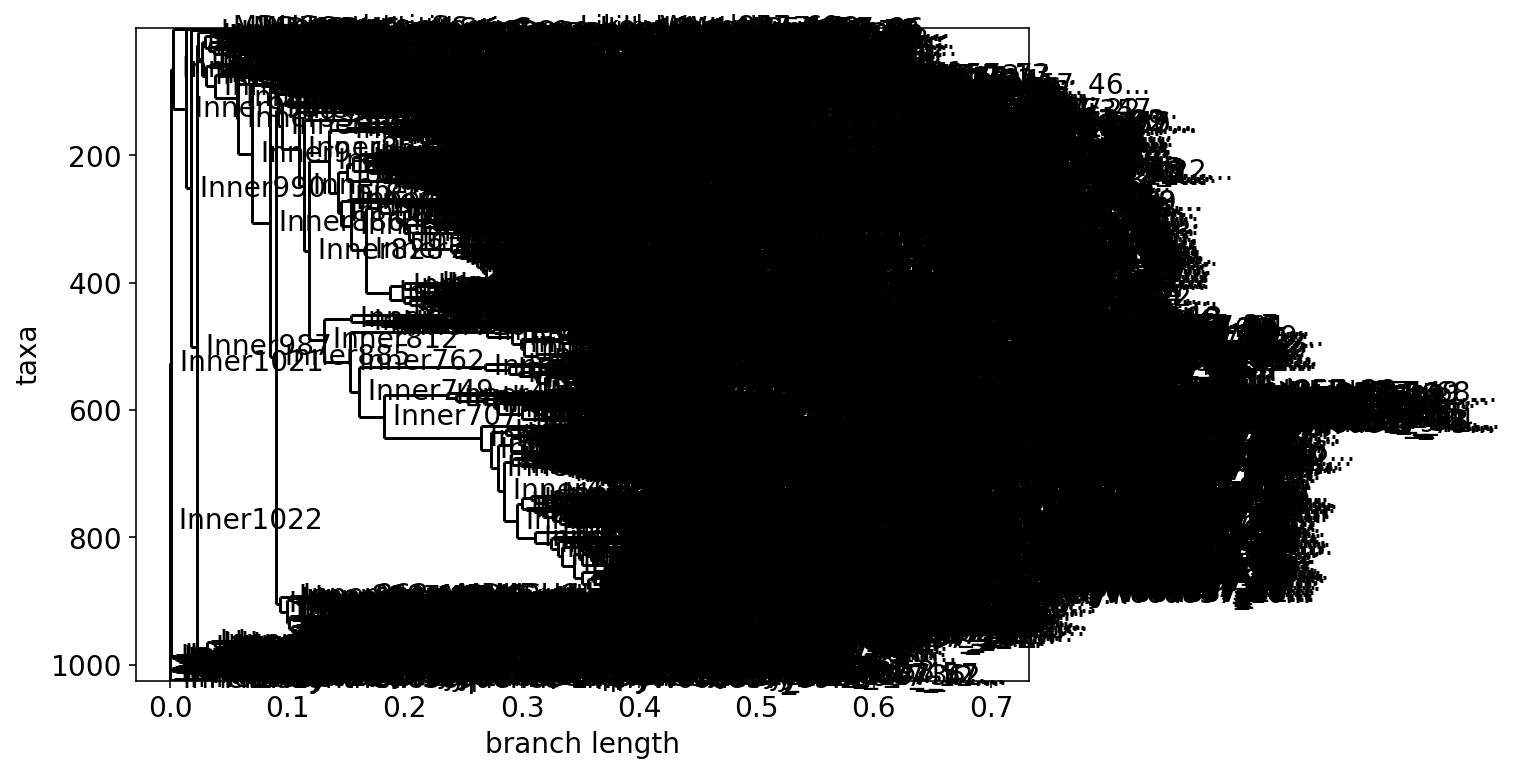

In [ ]:
tree_sample_normal_2 = Phylo.read("mdh-tree-gen-sample-normal-2.xml", "phyloxml")
Phylo.draw(tree_sample_normal_2)

# Data: beta sampled generated sequences likely-wood-857

### Method 1: compute sequence distance using embeddings

In [ ]:
sample_fasta_path = Path("/homes/abrace/src/SyntheticSequenceEvaluation/Examples/GMM-alpha-10-beta-16-seed-50-filtered.fasta")
sample_seqs = get_seqs_from_fasta(sample_fasta_path)

In [ ]:
# get the indices of those sample sequences
sample_inds_list = []
for i in range(len(sample_seqs)):
    sample_inds_list.append(int(sample_seqs[i].id.split("-")[-1]))

# turn the list to an array
sample_inds = np.array(sample_inds_list)

print(sample_inds)
print(len(sample_inds))

[ 664  917  154  254  576  760   59  377   60  550  679  693  183  493
  306  461  541 1004  386  383  110  828  535  499 1023  312  972  301
   97  555 1020  253  948  483  873  944  827   42  633    2  567  237
  185  863  612  839  564  556  838  399  960  404  815  616  779  677
  659    1  895  179  380  397   32  991  113  879  784   13  733  789
  287  973  417  424  457  806  510  626  691  164   51  336  639  854
  316  442  710  966  669  388]
90


In [ ]:
sample_embed_avg_list = []
for ind in sample_inds:
    sample_embed_avg_list.append(gen_embed_avg[ind])

sample_embed_avg = np.array(sample_embed_avg_list)
# print(sample_embed)
print(len(sample_embed_avg))

90


In [ ]:
constructor = DistanceTreeConstructor()

In [ ]:
dm = get_distance(sample_embed_avg, sample_seqs)

4005it [00:00, 97317.05it/s]


In [ ]:
tree = constructor.nj(dm)

In [ ]:
Phylo.write(tree, "mdh-tree-gen-sample-embed.xml", "phyloxml")
Phylo.write(tree, "mdh-tree-gen-sample-embed.tree", "newick")

1

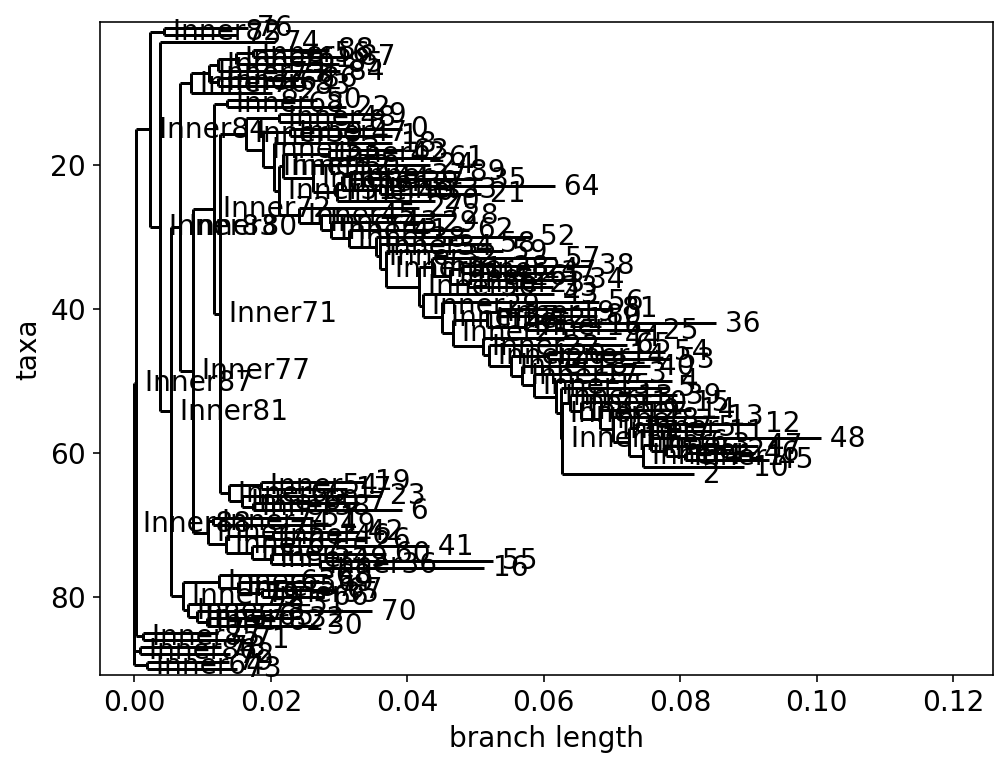

In [ ]:
tree_sample = Phylo.read("mdh-tree-gen-sample-embed.xml", "phyloxml")
# tree_read.laddersize()
Phylo.draw(tree_sample)

In [ ]:
# Phylo.draw_ascii(tree_sample)

### Method 2: compute sequence distance using Phylo's built-in distance calculator ("normal")


To get the MSA:<br>
`/homes/abrace/envs/msa-conda-env/bin/clustalo --in=/homes/abrace/src/SyntheticSequenceEvaluation/Examples/GMM-alpha-10-beta-16-seed-50-filtered.fasta --out=/homes/lind/MDH-pipeline/phylogeny/likely-wood-857-gen-sample.aln --force --outfmt=clustal --wrap=80 --threads=40 -v &> mdh_val_msa.out`

In [ ]:
aln = AlignIO.read('likely-wood-857-gen-sample.aln', 'clustal')
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)

In [ ]:
constructor = DistanceTreeConstructor(calculator, 'nj')
tree = constructor.build_tree(aln)

In [ ]:
Phylo.write(tree, "mdh-tree-gen-sample-normal.xml", "phyloxml")
Phylo.write(tree, "mdh-tree-gen-sample-normal.tree", "newick")

1

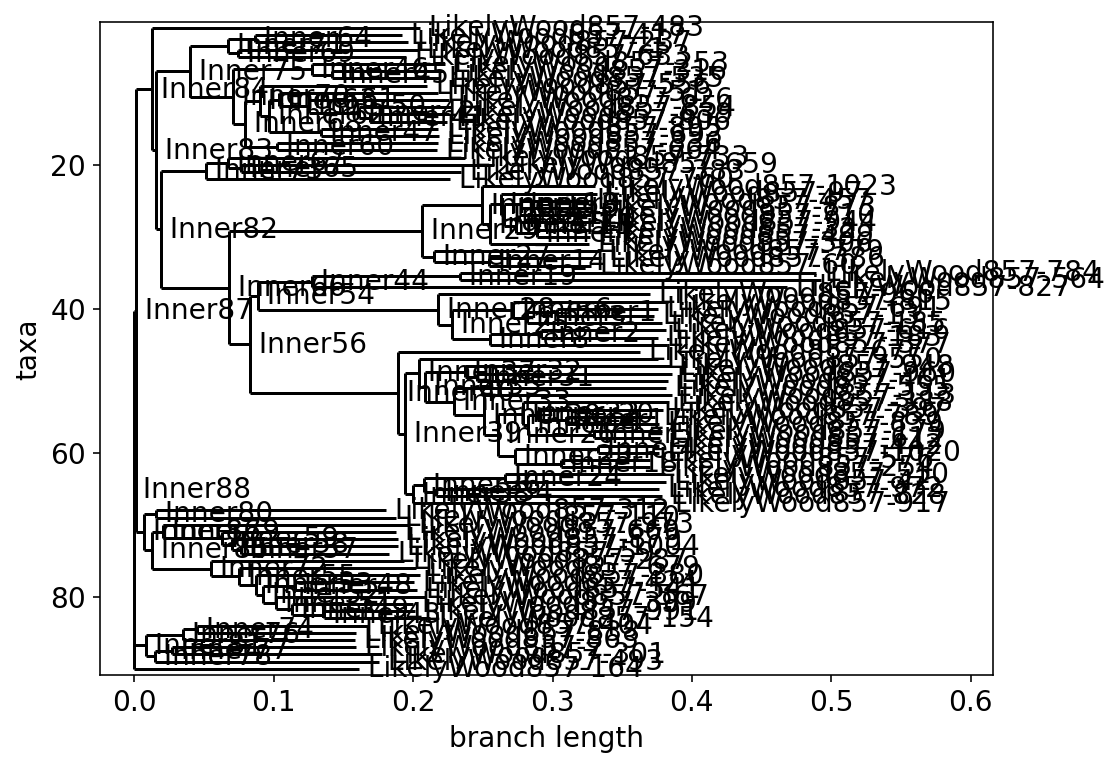

In [ ]:
tree_sample_normal = Phylo.read("mdh-tree-gen-sample-normal.xml", "phyloxml")
Phylo.draw(tree_sample_normal)

# Data: Validation sequences likely-wood-857

### Randomly select 100 and 1000 sequences

In [ ]:
def generate_randint(start: int, end: int, num: int) -> np.ndarray:
    # start: lower bound of range (inclusive)
    # end: upper bound of range (inclusive)
    # number of random integers to generate
    rand_nums_list = []
    
    while len(rand_nums_list) < num:
        rand_nums_list.append(np.random.randint(start, end))
        rand_nums_list = list(set(rand_nums_list))
    return np.array(rand_nums_list)

In [ ]:
val_embed_path = Path("/homes/mzvyagin/mdh_gpt2/likely-wood-857/likely-wood-857-val_fasta_embeddings_mean.npy")
val_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/val_folder_concatenated.fasta")

In [ ]:
val_embed_avg = np.load(val_embed_path)
val_seqs = get_seqs_from_fasta(val_fasta_path)
print(len(val_seqs))

3664


In [ ]:
inds_100 = generate_randint(0, 3664, 100)
print(len(inds_100))

100


In [ ]:
inds_1000 = generate_randint(0, 3664, 1000)
print(len(inds_1000))

1000


In [ ]:
val_embed_avg_100_list = []
val_seqs_100_list = []

for ind in inds_100:
    val_embed_avg_100_list.append(val_embed_avg[ind])
    val_seqs_100_list.append(val_seqs[ind])
    
val_embed_avg_100 = np.array(val_embed_avg_100_list)
val_seqs_100 = np.array(val_seqs_100_list)
print(len(val_embed_avg_100))
print(len(val_seqs_100))

100
100


/tmp/ipykernel_3517272/610068697.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val_seqs_100 = np.array(val_seqs_100_list)


In [ ]:
val_embed_avg_1000_list = []
val_seqs_1000_list = []

for ind in inds_1000:
    val_embed_avg_1000_list.append(val_embed_avg[ind])
    val_seqs_1000_list.append(val_seqs[ind])

val_embed_avg_1000 = np.array(val_embed_avg_1000_list)
val_seqs_1000 = np.array(val_seqs_1000_list)
print(len(val_embed_avg_1000))
print(len(val_seqs_1000))

1000
1000


/tmp/ipykernel_3517272/3023069724.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val_seqs_1000 = np.array(val_seqs_1000_list)


## 100 val sequences

#### Method 1: compute distance using embeddings

In [ ]:
constructor = DistanceTreeConstructor()
dm = get_distance(val_embed_avg_100, val_seqs_100)

4950it [00:00, 88248.97it/s]


In [ ]:
tree_val_100_1 = constructor.nj(dm)

In [ ]:
Phylo.write(tree_val_100_1, "mdh-tree-val-embed_100_1.xml", "phyloxml")
Phylo.write(tree_val_100_1, "mdh-tree-val-embed_100_1.tree", "newick")

1

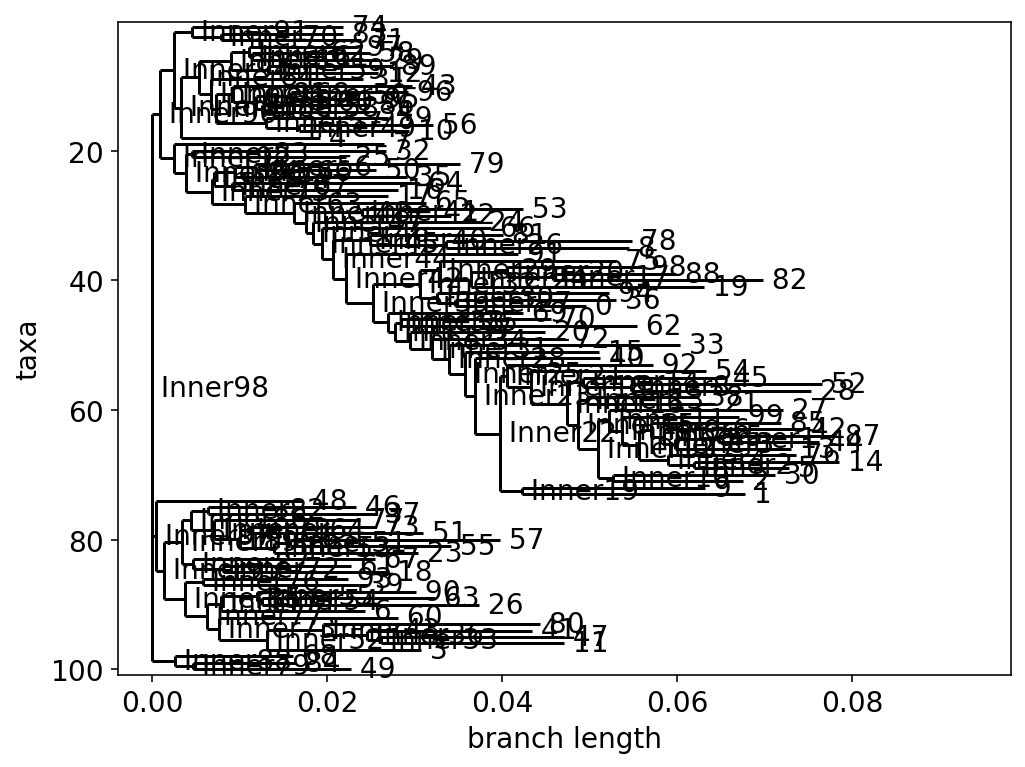

In [ ]:
tree_val_100_1 = Phylo.read("mdh-tree-val-embed_100_1.xml", "phyloxml")
Phylo.draw(tree_val_100_1)

### Method 2: compute sequence distance using Phylo's built-in distance calculator

In [ ]:
file_name = "/homes/lind/MDH-pipeline/phylogeny/likely-wood-857_val_100.fasta"
SeqIO.write(val_seqs_100, file_name, "fasta")

100

In [ ]:
aln = AlignIO.read('likely-wood-857-val_100.aln', 'clustal')
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)

In [ ]:
constructor = DistanceTreeConstructor(calculator, 'nj')
tree_val_100_2 = constructor.build_tree(aln)

In [ ]:
Phylo.write(tree_val_100_2, "mdh-tree-val_100_2.xml", "phyloxml")
Phylo.write(tree_val_100_2, "mdh-tree-val_100_2.tree", "newick")

1

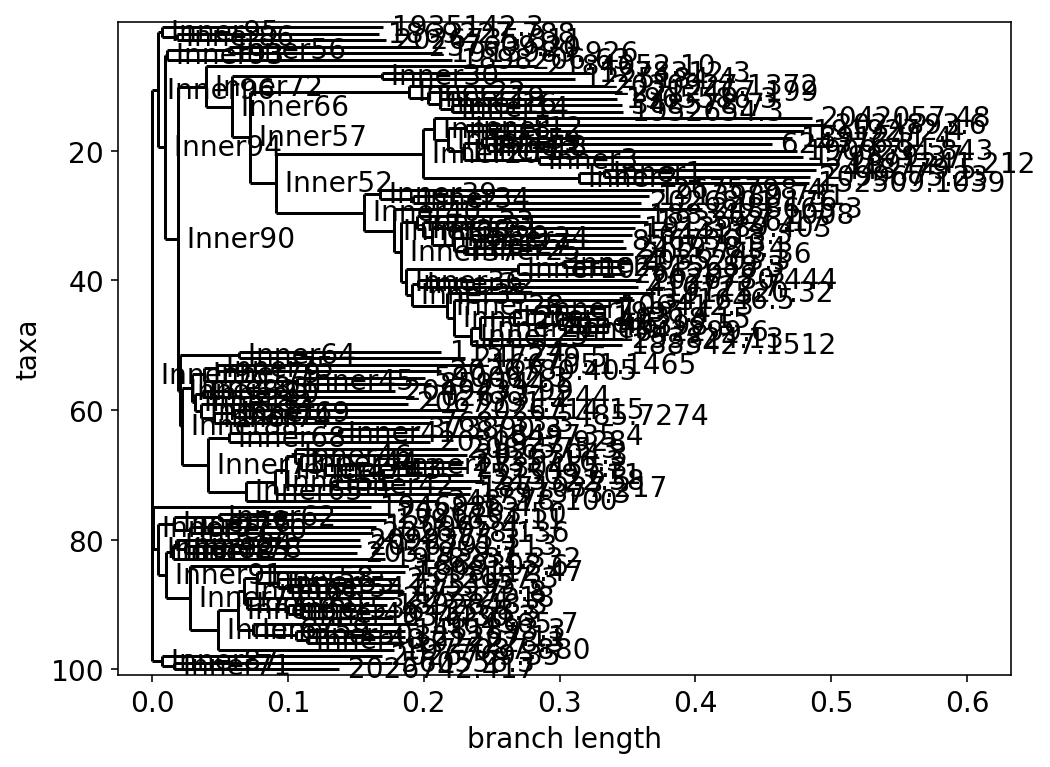

In [ ]:
tree_val_100_2 = Phylo.read("mdh-tree-val_100_2.xml", "phyloxml")
Phylo.draw(tree_val_100_2)

## 1000 val sequences

### Method 1: compute distance using embeddings

In [ ]:
constructor = DistanceTreeConstructor()
dm = get_distance(val_embed_avg_1000, val_seqs_1000)

499500it [00:45, 10956.86it/s]


In [ ]:
tree_val_1000_1 = constructor.nj(dm)

In [ ]:
Phylo.write(tree_val_1000_1, "mdh-tree-val-embed_1000_1.xml", "phyloxml")
Phylo.write(tree_val_1000_1, "mdh-tree-val-embed_1000_1.tree", "newick")

1

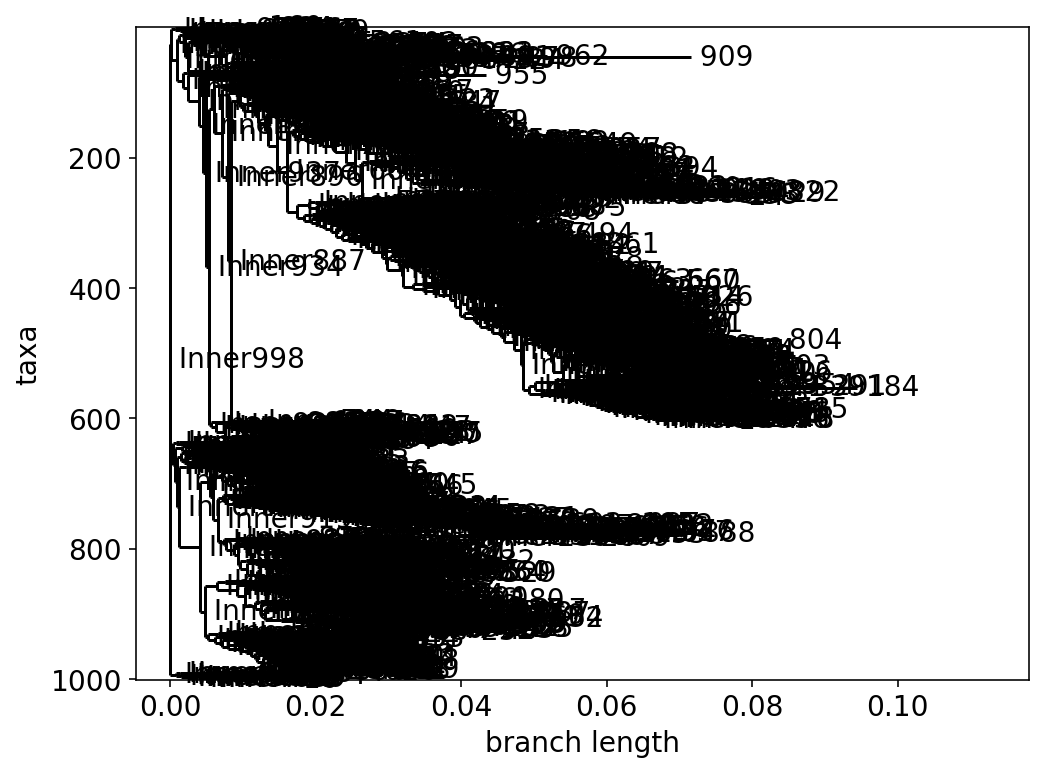

In [ ]:
tree_val_1000_1 = Phylo.read("mdh-tree-val-embed_1000_1.xml", "phyloxml")
Phylo.draw(tree_val_1000_1)

### Method 2: compute sequence distance using Phylo's built-in distance calculator

In [ ]:
file_name = "/homes/lind/MDH-pipeline/phylogeny/likely-wood-857_val_1000.fasta"
SeqIO.write(val_seqs_1000, file_name, "fasta")

1000

To get the MSA: <br>
`/homes/abrace/envs/msa-conda-env/bin/clustalo --in=/homes/lind/MDH-pipeline/phylogeny/likely-wood-857_val_1000.fasta --out=/homes/lind/MDH-pipeline/phylogeny/likely-wood-857-val_1000.aln --force --outfmt=clustal --wrap=80 --threads=40 -v &> mdh_val_msa.out`

In [ ]:
aln = AlignIO.read('likely-wood-857-val_1000.aln', 'clustal')
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)

ValueError: Duplicate names found

In [ ]:
constructor = DistanceTreeConstructor(calculator, 'nj')
tree_val_1000_2 = constructor.build_tree(aln)

In [ ]:
Phylo.write(tree_val_1000_2, "mdh-tree-val_1000_2.xml", "phyloxml")
Phylo.write(tree_val_1000_2, "mdh-tree-val_1000_2.tree", "newick")

In [ ]:
tree_val_1000_2 = Phylo.read("mdh-tree-val_1000_2.xml", "phyloxml")
Phylo.draw(tree_val_1000_2)